# Python for Data Science, Level I
### *Session \#9*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. Review

### Warm Ups

---

**Import pandas/matplotlib, set style, and create dataframe:**

In [1]:
#%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
#plt.style.use('seaborn-pastel') 

df = pd.read_csv('https://github.com/patricks1/python-for-data-science/'
                 'raw/master/Session09/housing_prices.csv')
display(df.head())

,crime_rate,big_lots_percent,office_percent,charles_river,nitrous,avg_num_rooms,pre_1940,distance_to_city,highway_access,tax_rate,student_teacher_ratio,median_price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,24000.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,21600.0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,34700.0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,33400.0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,36200.0


**Groupby:** `df.groupby('charles_river')['median_price'].mean()`

**Pivot table**: `df.pivot_table('median_price', index='highway_access')`

**Generate correlation table:** `df.corr()`

### Exercises
---
**1. Use a groupby to find the average** `nitrous` **rate grouped by** `highway_access`

In [2]:
result = df.groupby('highway_access')['nitrous'].mean()
display(result)

highway_access
1.0     0.462890
2.0     0.484917
3.0     0.452424
4.0     0.504311
5.0     0.570883
6.0     0.514846
7.0     0.441000
8.0     0.492500
24.0    0.672417
Name: nitrous, dtype: float64

**2. Plot the result as a bar chart**



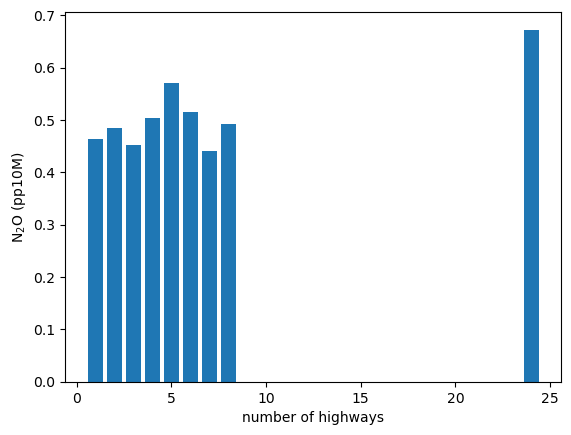

In [3]:
plt.bar(result.index, result)
plt.xlabel('number of highways')
plt.ylabel('$\mathrm{N_2O}$ (pp10M)')
plt.show()

**3. Generate the correlation table for the housing dataset, then fetch just the** `median_price` **row.**

In [4]:
cors = df.corr().loc['median_price']

**4. Create a bar plot of this Series to see which house features are more/less correlated with price.**

<Axes: >

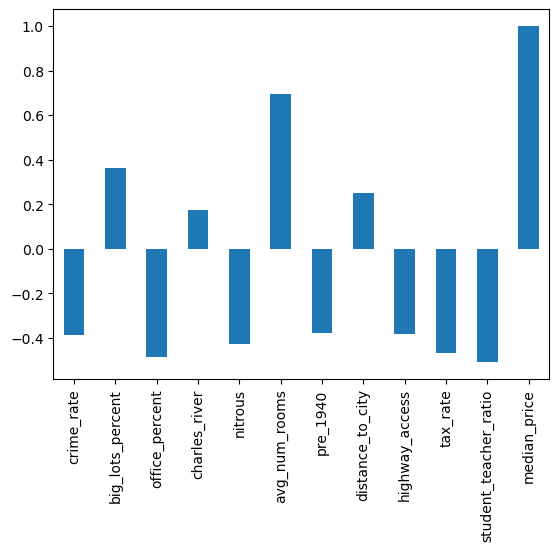

In [5]:
cors.plot.bar()

**5. Create a histogram of the** `highway_access` **column by fetching the column then calling** `.plot.hist()`

<Axes: ylabel='Frequency'>

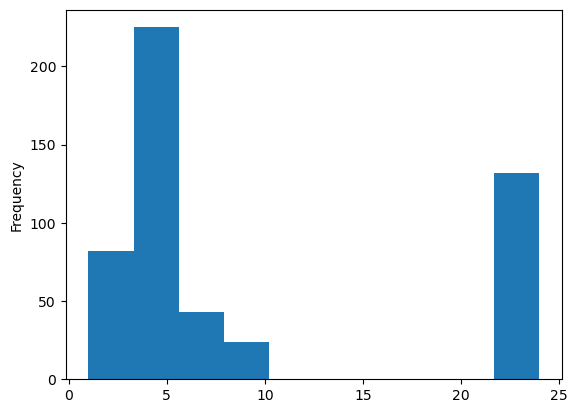

In [6]:
df['highway_access'].plot.hist()

**6. Create a scatter plot of the** `distance_to_city` **and** `median_price` **columns using:** `.plot.scatter(x='distance_to_city', y='median_price')`

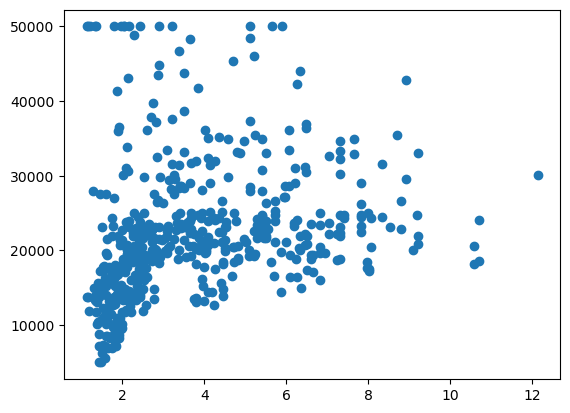

In [7]:
#df.plot.scatter(x='distance_to_city', y='median_price')

plt.scatter(df['distance_to_city'], df['median_price'])

## II. Basic Linear Regression

### Warm Ups

---

**Necessary imports:**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

**Create a linear model:** `model = LinearRegression()`

In [9]:
model = LinearRegression()

**Manually set the y-intercept of the model:** `model.intercept_ = 6000.0`

In [10]:
model.intercept_ = 6000.0

**Manually set the coefficient(s) of the model:** `model.coef_ = np.array([3000.0])` 

In [11]:
model.coef_ = np.array([3000.0])

**Make prediction column using your linear model:** `prediction = model.predict(df[['distance_to_city']])`

In [12]:
columns = ['distance_to_city']

prediction = model.predict(df[columns])

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:
print(type(prediction))

<class 'numpy.ndarray'>


**Plot your data and model:**
    
```python
plt.scatter(df['distance_to_city'], df['median_price'], color='black')
plt.plot(df['distance_to_city'], prediction)
```

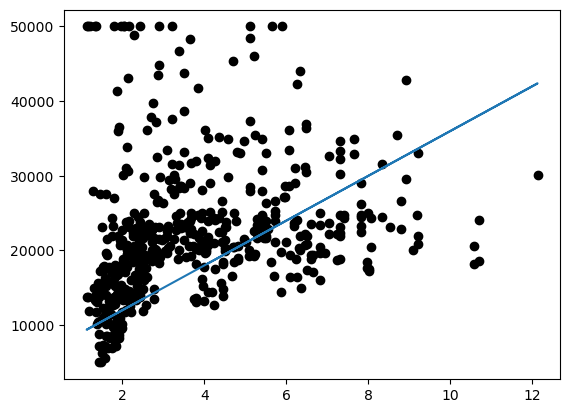

In [14]:
plt.scatter(df['distance_to_city'], df['median_price'], color='black')
plt.plot(df['distance_to_city'], prediction)

### Exercises
---
**1. Create a scatter plot with** `avg_num_rooms` **as the x-axis and** `median_price` **as y-axis**

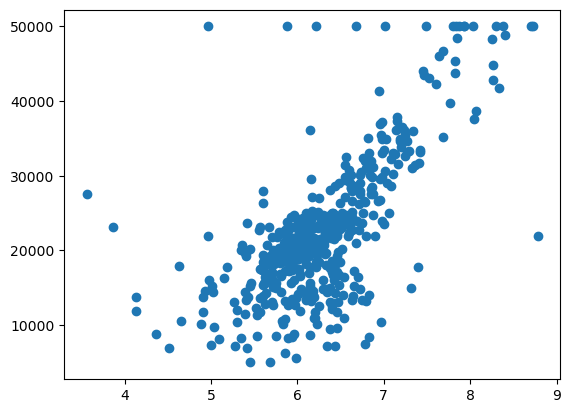

In [15]:
plt.scatter(df['avg_num_rooms'], df['median_price'])

**2. Create a** `LinearRegression` **model and manually set the intercept and coefficient.**

Hint: Try setting the intercept around `-35000` and the coefficient around `6000`.

In [16]:
model = LinearRegression()
model.intercept_ = -35000
model.coef_ = np.array([6000])

**3. Assign** `predicted` **to the output of** `model.predict()` **called on** `avg_num_rooms`

Hint: Remember that `model.predict()` expects a dataframe, not a column. 

In [17]:
columns = ['avg_num_rooms']

predicted_guess = model.predict(df[columns])

/Users/patrick/miniconda3/envs/python_for_data_science/lib/python3.10/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


**4. Create a line plot with** `predicted` **as the y-axis and** `avg_num_rooms` **as the x-axis.** 

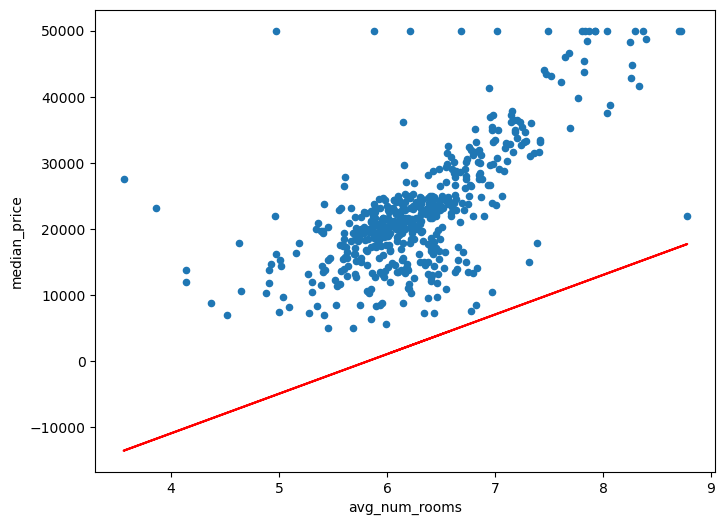

In [18]:
fig = plt.figure(figsize=(8,6))
ax=fig.add_subplot(111)
ax.plot(df['avg_num_rooms'], predicted_guess, color='red')
df.plot('avg_num_rooms', 'median_price', kind='scatter', ax=ax)
plt.show()

**5. Let's figure out which line has "best fit"! Write a function** `squared_error()` **that first takes two columns and finds the difference between each corresponding element. It should then square each difference and return the sum.**

Hint: No looping needed -- you can use subtraction on the columns themselves, thanks to Numpy element-wise operations.

In [19]:
def squared_error(col1, col2):
    squares = (col1-col2) ** 2.
    return squares.sum()

**6. Use** `squared_error()` **on the column** `median_price` **and** `predicted` **to see how well your line fits the data. This will be a BIG number -- don't worry! Tweak the intercept and coefficient, to see how it improves or degrades the fit of your line.**

In [20]:
print('{0:0.4e}'.format(squared_error(df['median_price'], predicted_guess)))

2.2333e+11


**7. Use** `model.fit()` **on** `avg_num_rooms` **and** `median_price` **to automatically optimize your linear model according to squared error. Repeat the steps from exercise 3 and 4 to overwrite** `predicted` **using your optimized model and graph the results.**

In [21]:
model.fit(df[['avg_num_rooms']], df['median_price'])

LinearRegression()

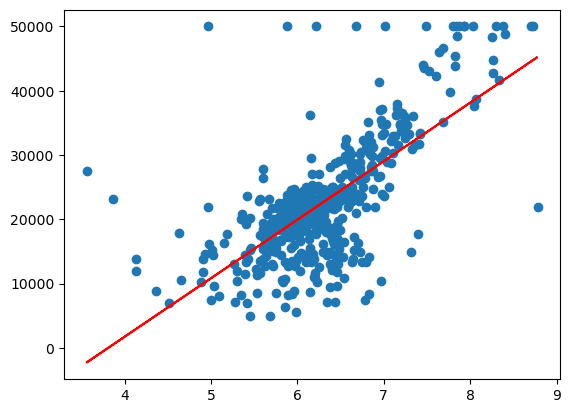

In [22]:
predicted_fit = model.predict(df[['avg_num_rooms']])
plt.plot(df['avg_num_rooms'], predicted_fit, color='red')
plt.scatter(df['avg_num_rooms'], df['median_price'])
plt.show()

**8. Check the sum of squared errors of the fitted line using your** `squared_error` **function.**  
Is this smaller or larger than the previous sum of squared errors?

In [23]:
print('{0:0.4e}'.format(squared_error(df['median_price'], predicted_fit)))

2.2062e+10
